<a href="https://colab.research.google.com/github/minhbao1705/AIO2023_HOMEWORK/blob/main/Multivariate_Non_Linear_Regresion_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/Fish.csv')
df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<ipython-input-5-a61f9cb204b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

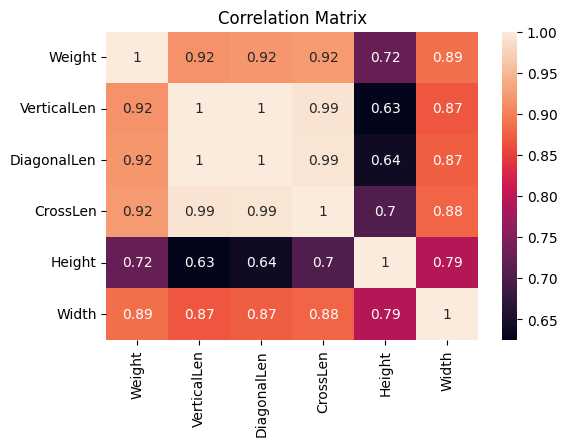

In [5]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

**One hot encoding**

In [6]:
encode_species = pd.get_dummies(df.Species)
encode_species.head(5)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


**Label Encoding**

In [7]:
df['Species'] = df['Species'].astype('category')
label_encoding_species = df['Species'].cat.codes
label_encoding_species

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 159, dtype: int8

In [8]:
new_df = pd.concat([df, encode_species], axis='columns')
new_df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [9]:
X = new_df[[
    'VerticalLen', 'DiagonalLen', 'CrossLen', 'Height', 'Width',
    'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'
]]
y = new_df['Weight']

In [10]:
X = X.values
y = y.values

In [11]:
X_data = np.hstack((np.ones((X.shape[0], 1)), X))
X_data

array([[ 1. , 23.2, 25.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 24. , 26.3, ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9, 26.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 12.1, 13. , ...,  0. ,  1. ,  0. ],
       [ 1. , 13.2, 14.3, ...,  0. ,  1. ,  0. ],
       [ 1. , 13.8, 15. , ...,  0. ,  1. ,  0. ]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (127, 13)
X_test shape:  (32, 13)
y_train shape:  (127,)
y_test shape:  (32,)


# 2. Linear Regression

In [13]:
def r2score(y_pred, y):
  rss = np.sum((y_pred - y)**2)
  tss = np.sum((y-y.mean())**2)

  r2 = 1 - (rss / tss)
  return r2

In [14]:
class LinearRegression:
  def __init__(self, X_data, y_target, learning_rate=0.00001, num_epochs=10000):
    self.X_data = X_data
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]

    # Initial Coefficients
    self.theta = np.random.randn(self.X_data.shape[1])
    self.losses=[]

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred-y_target)*(y_pred-y_target)
    loss = np.mean(loss)
    return loss

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def fit(self):
    for epoch in range(self.num_epochs):
      # predict
      y_pred = self.predict(self.X_data)

      # compute loss
      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)

      # compute gradient
      k = 2*(y_pred-self.y_target)
      gradients = self.X_data.T.dot(k)/self.num_samples

      # update weight
      self.theta = self.theta - self.learning_rate*gradients

      print(f'Epoch: {epoch} - Loss: {loss}')

    return {
        'loss': sum(self.losses)/len(self.losses),
        'weight': self.theta
    }

In [15]:
linear_model = LinearRegression(X_train, y_train, learning_rate=0.0001, num_epochs=100000)
linear_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 95000 - Loss: 13329.704170330373
Epoch: 95001 - Loss: 13329.677986660503
Epoch: 95002 - Loss: 13329.651803344097
Epoch: 95003 - Loss: 13329.625620381135
Epoch: 95004 - Loss: 13329.59943777159
Epoch: 95005 - Loss: 13329.573255515465
Epoch: 95006 - Loss: 13329.547073612706
Epoch: 95007 - Loss: 13329.520892063376
Epoch: 95008 - Loss: 13329.494710867382
Epoch: 95009 - Loss: 13329.468530024757
Epoch: 95010 - Loss: 13329.44234953545
Epoch: 95011 - Loss: 13329.41616939949
Epoch: 95012 - Loss: 13329.389989616851
Epoch: 95013 - Loss: 13329.36381018752
Epoch: 95014 - Loss: 13329.337631111475
Epoch: 95015 - Loss: 13329.311452388674
Epoch: 95016 - Loss: 13329.285274019185
Epoch: 95017 - Loss: 13329.2590960029
Epoch: 95018 - Loss: 13329.232918339856
Epoch: 95019 - Loss: 13329.206741030053
Epoch: 95020 - Loss: 13329.180564073422
Epoch: 95021 - Loss: 13329.154387470018
Epoch: 95022 - Loss: 13329.128211219795
Epoch: 95023 - Loss: 13329.10203532

{'loss': 18614.588460258987,
 'weight': array([-357.54612954,   70.65392045,   22.59001524,  -66.3167919 ,
          21.55173254,   45.14128634,   41.42746108,  -92.28904989,
        -129.36287466,  -68.21429075, -102.89585005,    6.19834965,
         -11.75477343])}

In [16]:
preds = linear_model.predict(X_train)
r2score(preds, y_train)

0.8925963554885584

In [17]:
preds = linear_model.predict(X_test)
r2score(preds, y_test)

0.9210024443859749